In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
def convert_csv_to_df(path,column_names):
    try:
        df = pd.read_csv(path, header=None, names=column_names)  
        return df
    except:
        raise IOError('File not Found')

In [3]:
def data_preprocessing(df):
    df.insert(0, 'Theta0', 1)
    
    cols = df.shape[1]
    X = df.iloc[:,0:cols-1]  
    Y = df.iloc[:,cols-1:cols]
    
    theta = np.matrix(np.array([0]*X.shape[1]))  
    X = np.matrix(X.values)  
    Y = np.matrix(Y.values)
    return X,Y,theta

In [4]:
def computeRSS(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [5]:
def gradientDescent(X, Y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - Y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeRSS(X, Y, theta)

    return theta, cost

In [6]:
path = 'ex1data1.txt'
column_names = ['Population', 'Profit']
df = convert_csv_to_df(path,column_names)

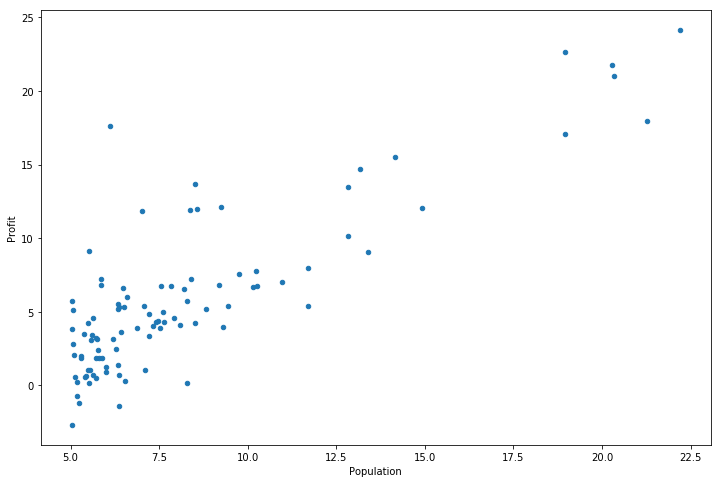

In [7]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [8]:
X, Y, theta = data_preprocessing(df)
initial_error = computeRSS(X, Y, theta)
initial_error

32.072733877455676

In [9]:
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
g

matrix([[-3.24140214,  1.1272942 ]])

In [10]:
final_error = computeRSS(X, Y, g)

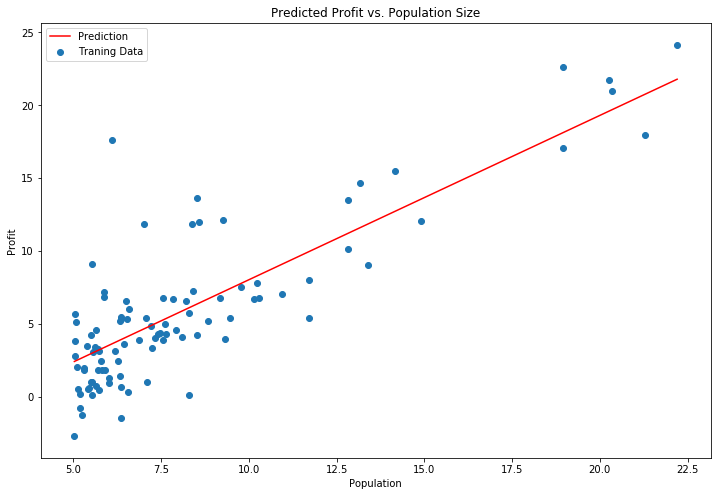

In [11]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  